In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_prefix = 'D:/USA 2020 Spring/data mining'

# Loading data 

In [4]:
pd.set_option('display.max_columns', None)
traindf = pd.read_csv(os.path.join(data_prefix, 'Python Lab/PYTHON_LAB_TRAIN.csv'))

# Data Clean

In [5]:
traindf.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,PROC_DATE,SCHED_HOSPITAL,CREATE_DT_TM,SCHED_START_DT_TM,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYT

In [6]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 292 entries, SCHED_SURG_AREA to LOS
dtypes: float64(279), int64(1), object(12)
memory usage: 178.2+ MB


## Drop someone don't go to office 

In [7]:
traindf.dropna(subset = ["FEMALE"], inplace=True)

## Drop column that have over 95% Nan values 

In [8]:
print("Total Train Features with NaN Values = " + str(traindf.columns[traindf.isnull().sum() != 0].size))

Total Train Features with NaN Values = 178


In [9]:
for col in traindf:
    if sum(pd.isnull(traindf[col]))>len(traindf) * 0.95:
        traindf.drop([col],axis=1,inplace=True)
print('\nTrain shape: {}'.format(traindf.shape)) 


Train shape: (69813, 240)


In [10]:
print("Total Train Features with NaN Values = " + str(traindf.columns[traindf.isnull().sum() != 0].size))

Total Train Features with NaN Values = 126


## Drop the same features

In [11]:
traindf = traindf.drop(["CAV_REC_SEX","CAV_REC_LANG","CAV_REC_AGE"], axis=1)

## Fill nan values by mode or mean 

In [12]:
for col in traindf:
    if traindf[col].dtype == "object":
        traindf[col].fillna(traindf[col].mode()[0], inplace=True)
    else:
        traindf[col].fillna(traindf[col].mean(), inplace=True)

In [13]:
print("Total Train Features with NaN Values = " + str(traindf.columns[traindf.isnull().sum() != 0].size))

Total Train Features with NaN Values = 0


## Transformed age to young, mid_age, old, older 

In [14]:
# age to young, mid_age, old, older
def age_simple(age):
    if age<=44:
        return "young"
    elif age>44 and age<=59:
        return "mid_age"
    elif age>59 and age<=74:
        return "old"
    elif age>74:
        return "older"

In [15]:
traindf["age_people"] = traindf["AGE_ON_CONTACT_DATE"].apply(age_simple)

## Transformed the length of stay post-surgery into Long stay or Short stay 

In [16]:
#define a long stay as > 5 days post-surgery. (1: long, 0: short)
traindf["risk"] = traindf.LOS.apply(lambda x : 1 if x >5  
                                         else (0))

## Convert object to numeric data by one-hot encoding

In [17]:
pd.set_option('display.max_rows', 245)
traindf.dtypes

SCHED_SURG_AREA                      object
RACE                                 object
ETHNIC_GROUP                         object
PROC_DATE                            object
SCHED_HOSPITAL                       object
CREATE_DT_TM                         object
SCHED_START_DT_TM                    object
SCHED_SURG_PROC_CD                    int64
FEMALE                              float64
AGE_ON_CONTACT_DATE                 float64
BMI                                 float64
WEIGHT                              float64
BP_SYSTOLIC                         float64
BP_DIASTOLIC                        float64
PULSE                               float64
PCPVISIT                            float64
METFORMIN_FLAG                      float64
OPIOIDS_FLAG                        float64
ALPHA_BLOCKERS                      float64
CENTRAL_ANTAGONISTS                 float64
RENIN                               float64
BETA_BLOCKERS                       float64
ACE_INHIB                       

In [18]:
cat_col = []
for col in traindf:
    if traindf[col].dtype == "object":
        cat_col.append(col)
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for column in cat_col:
    traindf[column] = lb.fit_transform(traindf[column])

## Get X_train, Y_train, X_test 

In [19]:
traindf.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,PROC_DATE,SCHED_HOSPITAL,CREATE_DT_TM,SCHED_START_DT_TM,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,ADI_2015,LOS,age_people,risk
0,2,16,2,133,0,20960,7511,3904785,0.0,73.3,28.21,3056.0,102.000000,70.000000,83.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [20]:
X_train = traindf.drop(["LOS","risk","AGE_ON_CONTACT_DATE"], axis=1)

In [21]:
Y_train=traindf[["risk"]]

# Training

## Normalization

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_vars = scaler.fit_transform(X_train)

## Split 

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train_vars, Y_train, test_size = 0.2, random_state = 1)

## logistic regressor 

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
model_log = log.fit(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
y_probs_train_log = model_log.predict_proba(x_train)
y_probs_val_log = model_log.predict_proba(x_val)

In [26]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train_log[:,1])
metrics.auc(fpr, tpr)

0.741186460702125

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_probs_val_log[:,1])
metrics.auc(fpr, tpr)

0.739174182348729

In [28]:
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(8,8)})

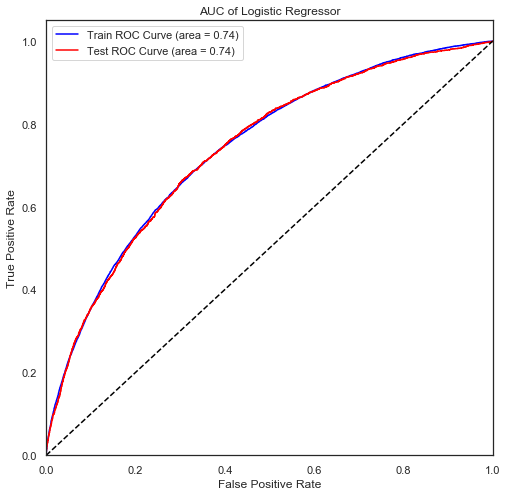

In [29]:
## We draw the ROC and depend on the auc we can see there is a little bit overfitting
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train, y_probs_train_log[:,1])[0],roc_curve(y_train, y_probs_train_log[:,1])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, y_probs_train_log[:,1]))

plt.plot(roc_curve(y_val,   y_probs_val_log[:,1])[0],roc_curve(y_val,  y_probs_val_log[:,1])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_val,  y_probs_val_log[:,1]))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC of Logistic Regressor')
plt.legend()
plt.show()

## RandomForest 

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(random_state = 0, n_jobs = -1,
                               max_features = 10,
                               max_depth = 8,
                               min_samples_split = 10,
                               min_samples_leaf = 5,
                               n_estimators= 50)

In [32]:
model_rf = rf.fit(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [33]:
y_probs_train_rf = model_rf.predict_proba(x_train)
y_probs_val_rf = model_rf.predict_proba(x_val)

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train_rf[:,1])
metrics.auc(fpr, tpr)

0.8134318316368399

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_probs_val_rf[:,1])
metrics.auc(fpr, tpr)

0.78884898670546

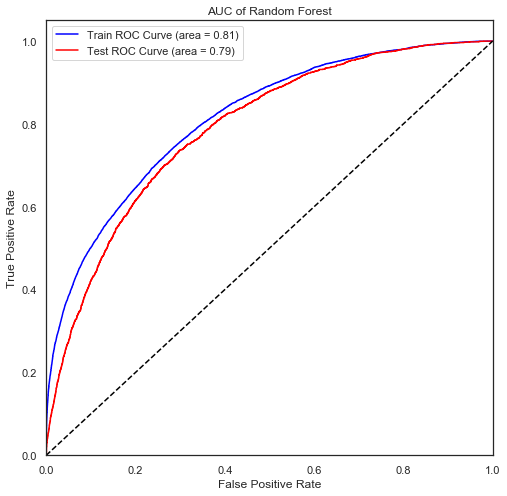

In [36]:
## We draw the ROC and depend on the auc we can see there is a little bit overfitting
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train, y_probs_train_rf[:,1])[0],roc_curve(y_train, y_probs_train_rf[:,1])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, y_probs_train_rf[:,1]))

plt.plot(roc_curve(y_val,   y_probs_val_rf[:,1])[0],roc_curve(y_val,  y_probs_val_rf[:,1])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_val,  y_probs_val_rf[:,1]))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC of Random Forest')
plt.legend()
plt.show()

## XGBoost

In [37]:
import xgboost as xgb
xgb_train = xgb.DMatrix(x_train, y_train)
xgb_val = xgb.DMatrix(x_val, y_val)

In [38]:
params_xgb = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'silent': 1,
    'max_depth' :6,
    'eta':0.35,
    #'subsample':0.9,
    #'min_child_weight': 30,
    #'scale_pos_weight':2 
    #'subsample': 0.9,
    #'subsample_freq' : 20,
    #'min_data_in_leaf' :50,
    #'min_sum_hessian_in_leaf':15,
    #'feature_fraction':0.9,
    
    
    #'scale_pos_weight' : 2,
    #'random_state' : 400
    
    # pos_bagging_fraction = ???,
    # neg_bagging_fraction = ???,
    # max_delta_step = ???,
    
}

In [39]:
model_xgb = xgb.train(params_xgb, xgb_train,100,
                      [(xgb_train,'Train'),(xgb_val,'Evaluation')], 
                      early_stopping_rounds = 50)

[0]	Train-auc:0.772859	Evaluation-auc:0.767948
Multiple eval metrics have been passed: 'Evaluation-auc' will be used for early stopping.

Will train until Evaluation-auc hasn't improved in 50 rounds.
[1]	Train-auc:0.7936	Evaluation-auc:0.78611
[2]	Train-auc:0.808354	Evaluation-auc:0.796878
[3]	Train-auc:0.81618	Evaluation-auc:0.80354
[4]	Train-auc:0.827624	Evaluation-auc:0.811119
[5]	Train-auc:0.834829	Evaluation-auc:0.816295
[6]	Train-auc:0.841489	Evaluation-auc:0.820831
[7]	Train-auc:0.846552	Evaluation-auc:0.824759
[8]	Train-auc:0.850103	Evaluation-auc:0.826721
[9]	Train-auc:0.853187	Evaluation-auc:0.827753
[10]	Train-auc:0.856263	Evaluation-auc:0.828434
[11]	Train-auc:0.859202	Evaluation-auc:0.829673
[12]	Train-auc:0.863078	Evaluation-auc:0.832614
[13]	Train-auc:0.864948	Evaluation-auc:0.832892
[14]	Train-auc:0.866632	Evaluation-auc:0.833259
[15]	Train-auc:0.867707	Evaluation-auc:0.833435
[16]	Train-auc:0.867794	Evaluation-auc:0.833375
[17]	Train-auc:0.867896	Evaluation-auc:0.83333

In [40]:
y_probs_train_xgb = model_xgb.predict(xgb_train)
y_probs_val_xgb = model_xgb.predict(xgb_val)

In [41]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train_xgb)
metrics.auc(fpr, tpr)

0.8707361189211632

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_probs_val_xgb)
metrics.auc(fpr, tpr)

0.8331242329043016

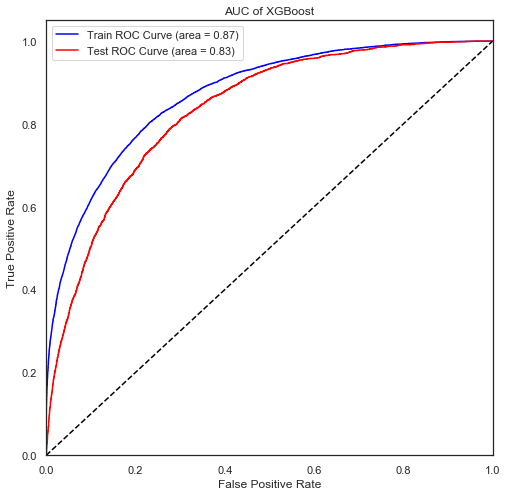

In [43]:
## We draw the ROC and depend on the auc we can see there is a little bit overfitting
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train, y_probs_train_xgb)[0],roc_curve(y_train, y_probs_train_xgb)[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, y_probs_train_xgb))

plt.plot(roc_curve(y_val,   y_probs_val_xgb)[0],roc_curve(y_val,  y_probs_val_xgb)[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_val,  y_probs_val_xgb))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC of XGBoost')
plt.legend()
plt.show()

## Lightgbm 

In [44]:
import lightgbm as lgb
lgb_train = lgb.Dataset(x_train, y_train)
lgb_val = lgb.Dataset(x_val, y_val, reference=lgb_train)

In [45]:
params_lgb = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'early_stopping_round' : 10,
    'num_threads' : 5,
    #"max_bin":100,
    'num_leaves':150,
    'learning_rate': 0.2,
    #'device_type': "gpu",
    'max_depth' :8,
    'subsample': 0.8,
    'subsample_freq' : 1,
    'min_data_in_leaf' :40,
    'min_sum_hessian_in_leaf':20,
    'feature_fraction':0.7,
    'lambda_l1' : 10,
    'lambda_l2' : 80
    
    
    #'scale_pos_weight' : ???
    
    # pos_bagging_fraction = ???,
    # neg_bagging_fraction = ???,
    # max_delta_step = ???,
    
}

In [46]:
model_lgb = lgb.train(params=params_lgb,
                train_set = lgb_train,
                num_boost_round=100,
                valid_sets = [lgb_train,lgb_val], 
                valid_names=['Train', 'Evaluation'])

C:\Users\USER\anaconda3\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	Train's auc: 0.750904	Evaluation's auc: 0.751026
Training until validation scores don't improve for 10 rounds
[2]	Train's auc: 0.78137	Evaluation's auc: 0.776287
[3]	Train's auc: 0.792529	Evaluation's auc: 0.786947
[4]	Train's auc: 0.80628	Evaluation's auc: 0.799027
[5]	Train's auc: 0.81187	Evaluation's auc: 0.803204
[6]	Train's auc: 0.820262	Evaluation's auc: 0.809516
[7]	Train's auc: 0.824084	Evaluation's auc: 0.811995
[8]	Train's auc: 0.826006	Evaluation's auc: 0.81292
[9]	Train's auc: 0.829706	Evaluation's auc: 0.816098
[10]	Train's auc: 0.831691	Evaluation's auc: 0.818029
[11]	Train's auc: 0.833557	Evaluation's auc: 0.819349
[12]	Train's auc: 0.836097	Evaluation's auc: 0.821365
[13]	Train's auc: 0.839472	Evaluation's auc: 0.824259
[14]	Train's auc: 0.841332	Evaluation's auc: 0.825738
[15]	Train's auc: 0.843117	Evaluation's auc: 0.827125
[16]	Train's auc: 0.844472	Evaluation's auc: 0.827882
[17]	Train's auc: 0.845373	Evaluation's auc: 0.828258
[18]	Train's auc: 0.847007	Evaluat

In [47]:
y_probs_train_lgb = model_lgb.predict(x_train)
y_probs_val_lgb = model_lgb.predict(x_val)

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train_lgb)
metrics.auc(fpr, tpr)

0.8821561461613834

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_probs_val_lgb)
metrics.auc(fpr, tpr)

0.8456755206102677

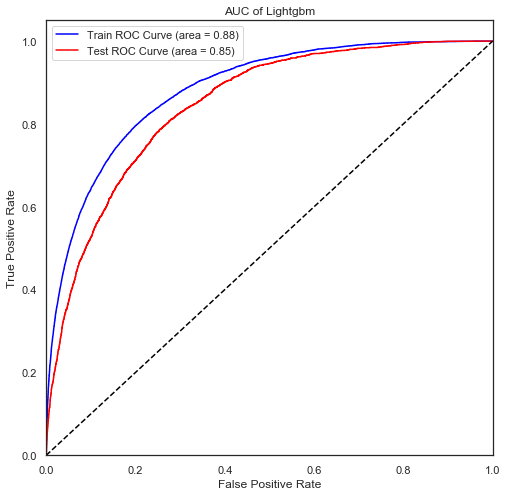

In [50]:
## We draw the ROC and depend on the auc we can see there is a little bit overfitting
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train, y_probs_train_lgb)[0],roc_curve(y_train, y_probs_train_lgb)[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, y_probs_train_lgb))

plt.plot(roc_curve(y_val, y_probs_val_lgb)[0],roc_curve(y_val, y_probs_val_lgb)[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_val, y_probs_val_lgb))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC of Lightgbm')
plt.legend()
plt.show()

## Lightgbm Hyperopt 

In [50]:
import hyperopt as hp
from hyperopt import Trials,fmin,STATUS_OK

In [51]:
import numpy as np
# Sets the space to search over and the prior probabilities over the search space 
lgbm_space = {

# hp.choice.choice will select 1 value from the given list  , 'dart', 'goss', 'rf'
    #'device_type': "gpu",
    'boosting_type': hp.hp.choice('boosting_type',  ['gbdt']),
    'metric' : 'auc',
    'nthread': 5, 
    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),
    'num_leaves':hp.hp.choice('num_leaves', np.arange(100, 300,1, dtype=int)),
    
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'bagging_freq':hp.hp.choice('bagging_freq', np.arange(1, 100,1, dtype=int)),
    'feature_fraction':hp.hp.quniform('feature_fraction',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 10, 300,10),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),
    
    'reg_alpha': hp.hp.uniform('reg_alpha', 0.0, 500.0),
    'reg_lambda': hp.hp.uniform('reg_lambda', 0.0, 500.0),
    
    'max_bin': 512
    
    
    
    }

In [52]:
def objective_m(params, n_folds=5):


    model = lgb.cv(params = params,
              train_set = lgb_train,
              num_boost_round = 100,
              early_stopping_rounds = 10,
             nfold = n_folds)
  
    
  
    # returns the best average loss on validation set 
    
    loss = 1 - (max(model['auc-mean']))
    return loss


bayes_trials = Trials()
MAX_EVALS = 2000 # this controls the runtime 

model_lgb_best = fmin(fn = objective_m, space = lgbm_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS, trials = bayes_trials)

100%|█████████████████████████████████████████████| 2000/2000 [3:45:01<00:00,  6.75s/it, best loss: 0.1492578248624984]


In [54]:
model_lgb_best

{'bagging_freq': 63,
 'boosting_type': 0,
 'feature_fraction': 0.5,
 'learning_rate': 0.06823750425436503,
 'min_child_weight': 50.0,
 'num_leaves': 17,
 'reg_alpha': 0.5885103042288208,
 'reg_lambda': 38.2963060547994,
 'scale_pos_weight': 7.183922157578607,
 'subsample': 1.0}

In [51]:
params_lgb_best = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    #'nthread': 5,
    'max_bin': 512,
    'early_stopping_round': 10,
    'learning_rate': 0.06823750425436503,
    'num_leaves':17,
    
    'subsample': 1.0,
    'bagging_frequency': 63,
    'feature_fraction': 0.5,
    'min_child_weight': 50.0,
    'scale_pos_weight': 7.183922157578607,
    #'min_sum_hessian_in_leaf':50,
    
    'reg_alpha': 0.5885103042288208,
    'reg_lambda': 38.2963060547994
    
    
}

In [52]:
model_lgb_best = lgb.train(params=params_lgb_best,
                train_set = lgb_train,
                num_boost_round=100,
                valid_sets = [lgb_train,lgb_val], 
                valid_names=['Train', 'Evaluation'])

C:\Users\USER\anaconda3\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	Train's auc: 0.697163	Evaluation's auc: 0.695709
Training until validation scores don't improve for 10 rounds
[2]	Train's auc: 0.741446	Evaluation's auc: 0.738561
[3]	Train's auc: 0.771837	Evaluation's auc: 0.768865
[4]	Train's auc: 0.798983	Evaluation's auc: 0.79325
[5]	Train's auc: 0.801019	Evaluation's auc: 0.796922
[6]	Train's auc: 0.807888	Evaluation's auc: 0.804188
[7]	Train's auc: 0.811912	Evaluation's auc: 0.808413
[8]	Train's auc: 0.811804	Evaluation's auc: 0.808564
[9]	Train's auc: 0.815122	Evaluation's auc: 0.81154
[10]	Train's auc: 0.817777	Evaluation's auc: 0.813901
[11]	Train's auc: 0.818608	Evaluation's auc: 0.815193
[12]	Train's auc: 0.820006	Evaluation's auc: 0.815484
[13]	Train's auc: 0.821173	Evaluation's auc: 0.815883
[14]	Train's auc: 0.821625	Evaluation's auc: 0.816178
[15]	Train's auc: 0.822399	Evaluation's auc: 0.816785
[16]	Train's auc: 0.823236	Evaluation's auc: 0.817422
[17]	Train's auc: 0.823348	Evaluation's auc: 0.817235
[18]	Train's auc: 0.823668	Evalu

In [53]:
y_probs_train_lgb_best = model_lgb_best.predict(x_train)
y_probs_val_lgb_best = model_lgb_best.predict(x_val)

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train_lgb_best)
metrics.auc(fpr, tpr)

0.8562954571083646

In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_probs_val_lgb_best)
metrics.auc(fpr, tpr)

0.8447119077808225

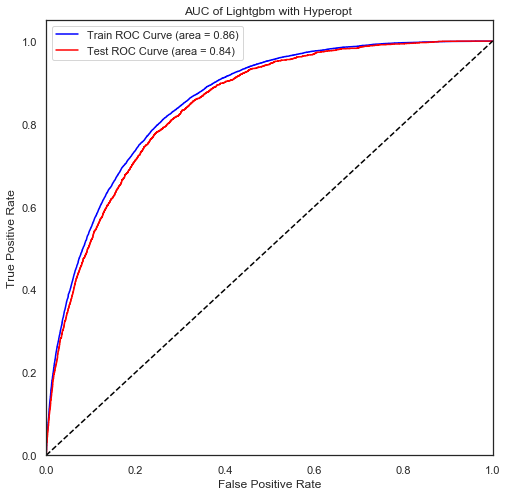

In [56]:
## We draw the ROC and depend on the auc we can see there is a little bit overfitting
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train, y_probs_train_lgb_best)[0],roc_curve(y_train, y_probs_train_lgb_best)[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, y_probs_train_lgb_best))

plt.plot(roc_curve(y_val, y_probs_val_lgb_best)[0],roc_curve(y_val, y_probs_val_lgb_best)[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_val, y_probs_val_lgb_best))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC of Lightgbm with Hyperopt ')
plt.legend()
plt.show()

# SHAP

In [57]:
import shap
model_explainer = shap.TreeExplainer(model_lgb_best)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [58]:
shap_vals_train=model_explainer.shap_values(x_train)
shap_vals_test=model_explainer.shap_values(x_val)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


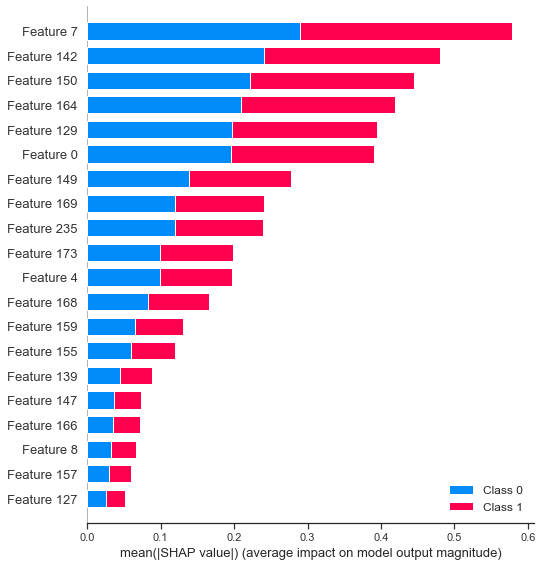

In [59]:
shap.summary_plot(shap_vals_train, x_train)

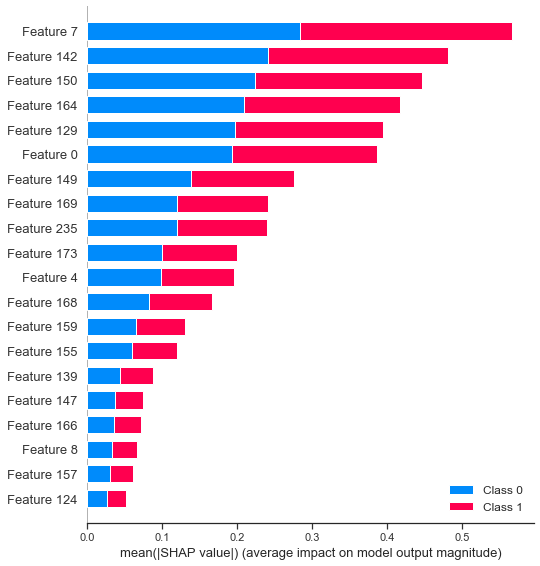

In [60]:
shap.summary_plot(shap_vals_test, x_val)

# Save model

In [61]:
import pickle
with open(os.path.join(data_prefix, 'ds_surgery_proj/pre_lgbm_model.pckl'), 'wb') as fout:
    pickle.dump(model_lgb_best, fout)